## About dataset:
This is iris dataset. It contains numeric attributes of flowers, namely, setosa, versicolor and virginica. We have to make decision tree classifier to classify these flowers based on its attributes.

## Problem Statement:
Classification of flower species based on its attributes

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Explore data

In [3]:
df.shape

(150, 6)

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Checking missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Checking duplicate values
df.duplicated().sum()

0

## Observation

* There are 150 rows and 6 columns in the dataset.
* There are neither any missing values nor any duplicates in the dataset.
* All the columns are numerical except 'Species' column.

## Data Preprocessing

* ### Remove unnecessary columns
'Id' column is not statistically important, hence I am removing it.

In [8]:
df.drop('Id', axis = 1, inplace = True)

* ### Changing categorical column into numerial
I will encode 'Species' column using replace() function.

In [9]:
# Checking values to be encoded
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
# Encode values
df['Species'] = df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
# Review data
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


I have preprocessed the data. Now, it is ready to be used for model building. Before directly jumping into model building, let's get more insights of the data through data visualization.

## Data Visualization

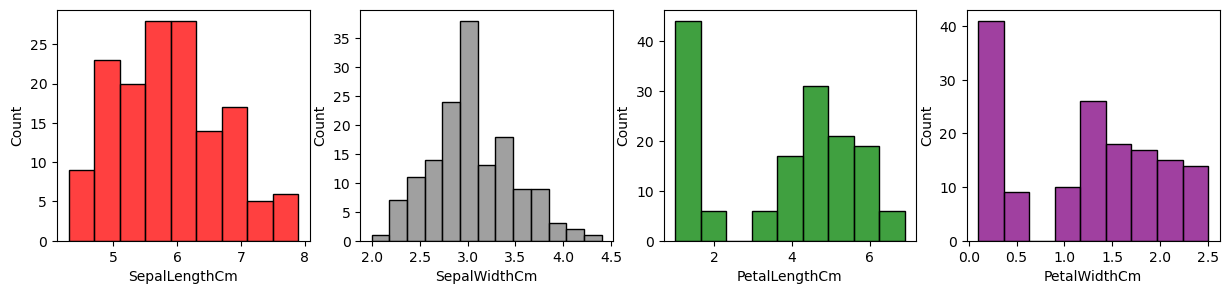

In [11]:
col_list = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
colors = ['red', 'gray', 'green', 'purple']
plt.figure(figsize=(15,3))
for i in range (4):
    plt.subplot(1,4,i+1)
    sns.histplot(df[col_list[i]], color=colors[i])
plt.show()

* Sepals are around 5 to 7 cm long.
* Sepals are 3 cm wide on an average.
* Petals of some species are short - around 1 to 2 cm long and for other species it is approximately 4 to 6 cm in length.
* Petals of some species are small - around 0.5 cm wide and for other species it is approximately 1 to 2.5 cm wider.

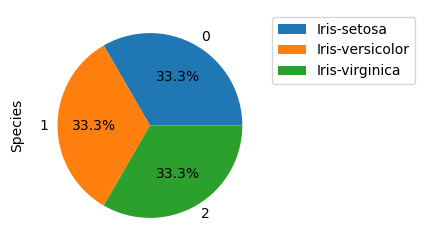

In [12]:
plt.figure(figsize=(3,3))
df['Species'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.legend(['Iris-setosa','Iris-versicolor','Iris-virginica'], bbox_to_anchor = (1,1))
plt.show()           

Dataset is balanced. It has equal proportion of all flower species.

<AxesSubplot:>

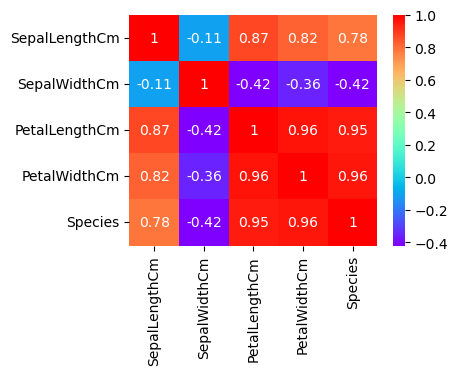

In [13]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(), annot=True, cmap= 'rainbow')

Target column 'Species' is strongly related to petal length and petal width.

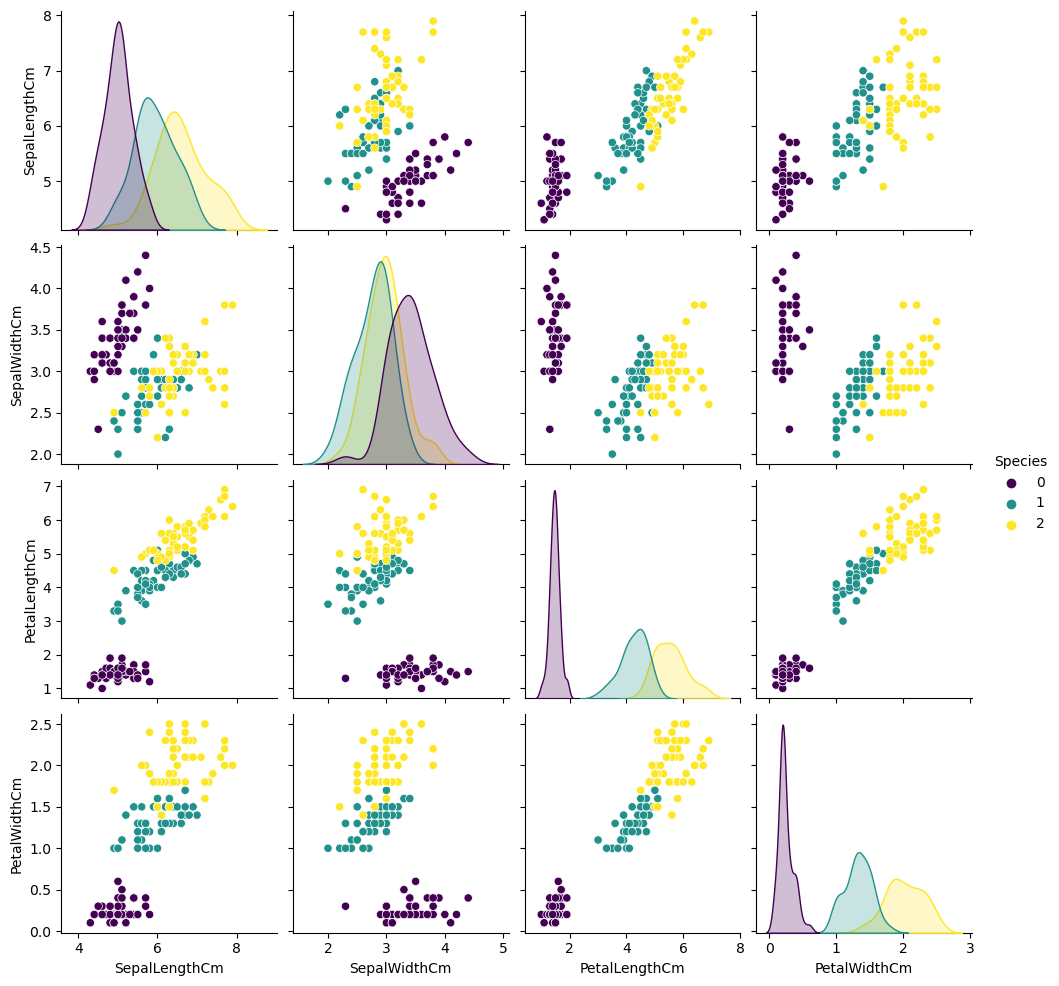

In [14]:
sns.pairplot(df, hue='Species', palette = 'viridis')

Setosa species seems smaller in size compared to other species. Virginica is the largest of all.

## Model Building: Decision Tree Classifier

In [15]:
# Define x & y
x = df.iloc[:,:-1]
y = df['Species']

In [16]:
# Splitting Data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25,random_state=20)

In [17]:
# Hyperparameter optimization using GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [1,2,3,4,5],
              'min_samples_split': [1,2],
              'min_samples_leaf': [1,2,3],
              'max_features': ['auto', 'sqrt']}

from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 2)
gd.fit(xtrain,ytrain)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2]},
             verbose=2)

In [18]:
# Best parameters
print("Best Score: ", gd.best_score_) 
print("Best Parameters: ", gd.best_params_)

Best Score:  0.9731225296442687
Best Parameters:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [19]:
# Evaluating model for best parameters
dtc_best = DecisionTreeClassifier(criterion= 'gini', 
                                  max_depth= 3, 
                                  max_features= 'sqrt', 
                                  min_samples_leaf= 2, 
                                  min_samples_split= 2)
model = dtc_best.fit(xtrain, ytrain)

In [20]:
# Prediction
ypred = dtc_best.predict(xtest)

In [21]:
# Evaluating model using sklearn metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy: ', accuracy_score(ytest, ypred))
print('-----------------------------------------------')
print('Confusion matrix: \n', confusion_matrix(ytest, ypred))
print('-----------------------------------------------')
print('Classification report: \n', classification_report(ytest, ypred))

Accuracy:  0.9210526315789473
-----------------------------------------------
Confusion matrix: 
 [[12  0  0]
 [ 0 12  2]
 [ 0  1 11]]
-----------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.86      0.89        14
           2       0.85      0.92      0.88        12

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



### This decision tree classifier has 92% accuracy !!

Let's visualize it graphically

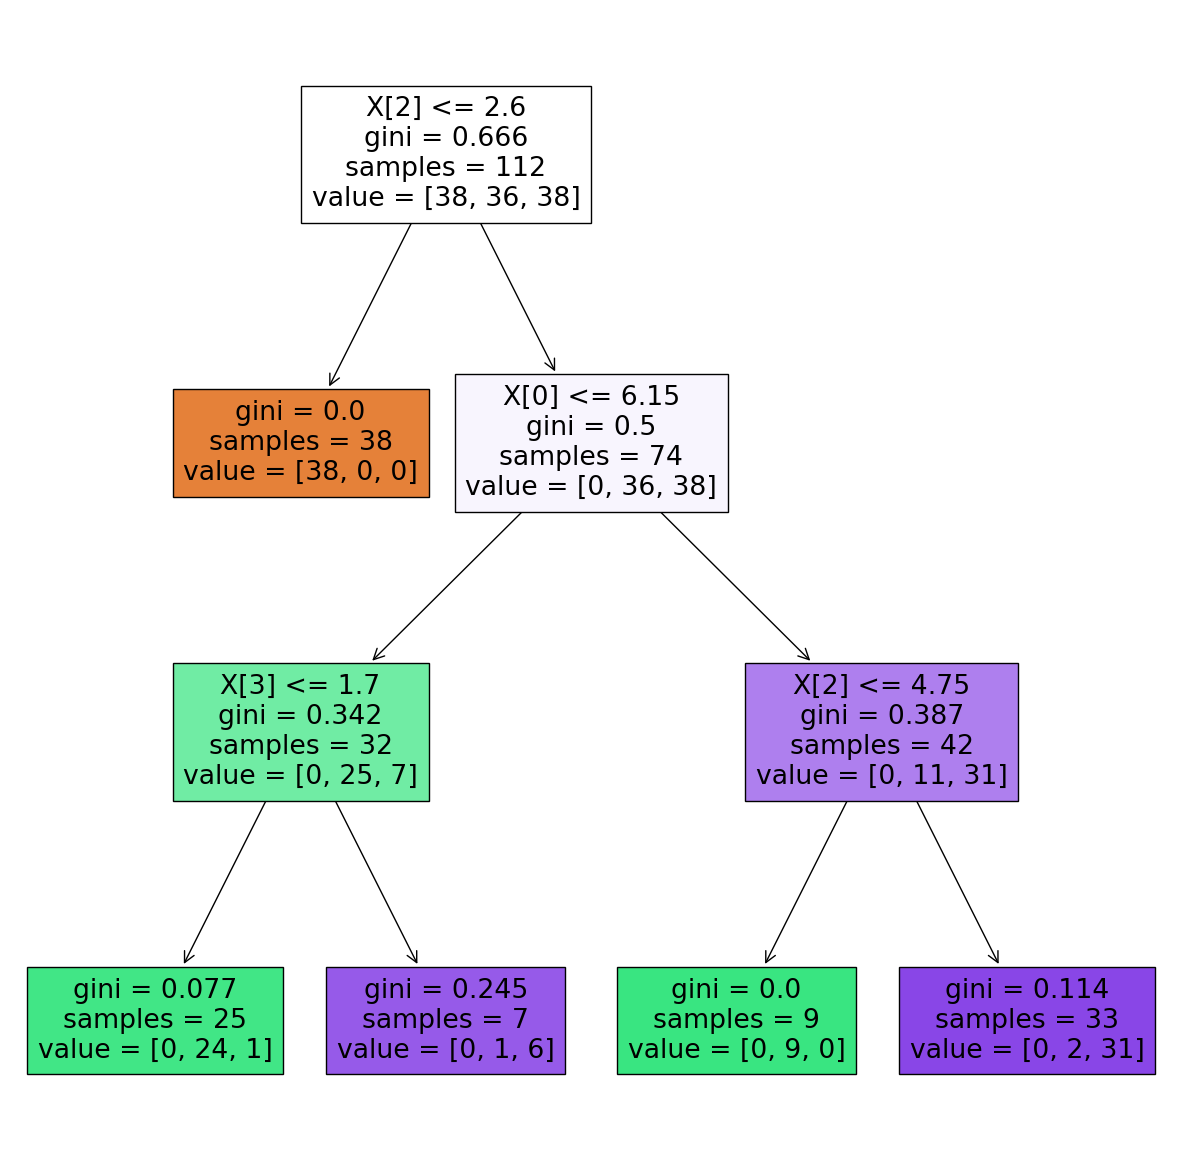

In [22]:
plt.figure(figsize=(15,15))
from sklearn import tree
tree.plot_tree(model, filled = True)
plt.show()

This is the decision tree for classification of Iris flower species.